In [2]:
import pandas as pd
import numpy as np

In [3]:
dances = pd.read_csv('../dataset/basic_dance.csv')
dances.head(5)

,Url
0,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...
1,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...
2,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...
3,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...
4,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...


In [4]:
for idx, row in dances.iterrows():
    print(idx, row.Url)
    if idx == 5:
        break

0 https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch01.mp4
1 https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch02.mp4
2 https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch03.mp4
3 https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch04.mp4
4 https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch05.mp4
5 https://aistdancedb.ongaaccel.jp/v1.0.0/video/10M/gBR_sBM_c01_d04_mBR0_ch06.mp4


In [5]:
def get_dance_name(dances):
    names = []
    for idx, row in dances.iterrows():
        names.append(row.Url[-29:-4])
    return names

names = get_dance_name(dances)

dances['name'] = names

In [6]:
dances

,Url,name
0,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch01
1,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch02
2,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch03
3,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch04
4,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch05
...,...,...
10793,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch06
10794,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch07
10795,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch08
10796,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch09


In [19]:
dances['name']
for row in dances['name']:
    pass

In [18]:
from datetime import date
import time

s1 = "2011-12-01"
s2 = "2011-12-21"

def get_date_month_day(date):
    lst = date.split('-')
    return int(lst[0]), int(lst[1]), int(lst[2])

def subtract_dates(date1, date2):
    y1, m1, d1 = get_date_month_day(date1)
    y2, m2, d2 = get_date_month_day(date2)

    d1 = date(y1, m1, d1)
    d2 = date(y2, m2, d2)

    return abs((d1 - d2).days)

def get_all_dates(csv_contents):
    content = pd.read_csv('../dataset/basic_dance.csv')
    dates = []
    for d in content['Date']:
        dates.append(d)
    return dates


20

In [54]:
import ast
def parse_imports(code: str):
    """
Parse the given Python source code and return the list of full-qualified paths for all imported symbols, sorted in ascending lexicographic order.
Example:
Input:
"import os\nimport concurrent.futures\nfrom os import path as renamed_path\nfrom typing import (List, Tuple)"
Output: ['concurrent.futures', 'os', 'os.path', 'typing.List', 'typing.Tuple']
    """
    pass

parsed = ast.parse("import os\nimport concurrent.futures\nfrom os import path as renamed_path\nfrom typing import (List, Tuple)")
for node in ast.walk(parsed):
    if isinstance(node, ast.Import) or isinstance(node, ast.ImportFrom):
        if isinstance(node, ast.ImportFrom):
            for n in node.names:
                print(f'{node.module}.{n.name}')
        else:
            for n in node.names:
                print(n.name)
    
imports = [

        node.names[0].name
        for node in ast.walk(parsed)
        if isinstance(node, ast.Import) or isinstance(node, ast.ImportFrom)
    ]

.os
.concurrent.futures
os.path
typing.List
typing.Tuple


In [40]:
parsed

In [128]:
def get_dance_info(dances):
    types = ['Genre', 'Situation', 'Camera', 'Dancer', 'Music', 'Choreography']
    info_dict = {info: [] for info in types}

    for idx, row in dances.iterrows():
        info_lst = row['name'].split('_')
        for i, info in enumerate(types):
            info_dict[info].append(info_lst[i])
    
    for info in types:
        dances[info] = info_dict[info]
    
    return dances


dances = get_dance_info(dances)
dances

,Url,name,Genre,Situation,Camera,Dancer,Music,Choreography
0,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch01,gBR,sBM,c01,d04,mBR0,ch01
1,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch02,gBR,sBM,c01,d04,mBR0,ch02
2,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch03,gBR,sBM,c01,d04,mBR0,ch03
3,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch04,gBR,sBM,c01,d04,mBR0,ch04
4,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c01_d04_mBR0_ch05,gBR,sBM,c01,d04,mBR0,ch05
...,...,...,...,...,...,...,...,...
10793,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch06,gWA,sBM,c09,d27,mWA5,ch06
10794,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch07,gWA,sBM,c09,d27,mWA5,ch07
10795,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch08,gWA,sBM,c09,d27,mWA5,ch08
10796,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gWA_sBM_c09_d27_mWA5_ch09,gWA,sBM,c09,d27,mWA5,ch09


In [143]:
dances = dances.sample(frac=1, random_state=1)
training_dances = dances[:500]
testing_dances = dances[500:600]

In [144]:
training_dances

,Url,name,Genre,Situation,Camera,Dancer,Music,Choreography
6833,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gLO_sBM_c03_d15_mLO5_ch04,gLO,sBM,c03,d15,mLO5,ch04
9134,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gPO_sBM_c05_d10_mPO1_ch07,gPO,sBM,c05,d10,mPO1,ch07
6378,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gLH_sBM_c09_d16_mLH1_ch09,gLH,sBM,c09,d16,mLH1,ch09
1661,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gHO_sBM_c05_d21_mHO4_ch02,gHO,sBM,c05,d21,mHO4,ch02
8943,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gPO_sBM_c03_d11_mPO4_ch06,gPO,sBM,c03,d11,mPO4,ch06
...,...,...,...,...,...,...,...,...
9548,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gPO_sBM_c08_d11_mPO5_ch01,gPO,sBM,c08,d11,mPO5,ch01
4387,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gKR_sBM_c01_d29_mKR4_ch08,gKR,sBM,c01,d29,mKR4,ch08
2303,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gJB_sBM_c02_d07_mJB2_ch04,gJB,sBM,c02,d07,mJB2,ch04
5372,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gKR_sBM_c09_d30_mKR3_ch03,gKR,sBM,c09,d30,mKR3,ch03


In [145]:
testing_dances

,Url,name,Genre,Situation,Camera,Dancer,Music,Choreography
4110,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gJS_sBM_c08_d01_mJS3_ch01,gJS,sBM,c08,d01,mJS3,ch01
899,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gBR_sBM_c08_d05_mBR1_ch10,gBR,sBM,c08,d05,mBR1,ch10
5785,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gLH_sBM_c04_d16_mLH2_ch06,gLH,sBM,c04,d16,mLH2,ch06
1325,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gHO_sBM_c03_d19_mHO0_ch06,gHO,sBM,c03,d19,mHO0,ch06
9148,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gPO_sBM_c05_d10_mPO3_ch01,gPO,sBM,c05,d10,mPO3,ch01
...,...,...,...,...,...,...,...,...
5103,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gKR_sBM_c07_d29_mKR4_ch04,gKR,sBM,c07,d29,mKR4,ch04
6837,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gLO_sBM_c03_d15_mLO5_ch08,gLO,sBM,c03,d15,mLO5,ch08
7657,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gMH_sBM_c01_d24_mMH3_ch08,gMH,sBM,c01,d24,mMH3,ch08
7837,https://aistdancedb.ongaaccel.jp/v1.0.0/video/...,gMH_sBM_c03_d22_mMH3_ch08,gMH,sBM,c03,d22,mMH3,ch08


In [153]:
# training_dances.to_csv('../dataset/training_dances.csv', index=False)
# testing_dances.to_csv('../dataset/testing_dances.csv', index=False)
training_dances = pd.read_csv('../dataset/training_dances.csv')

In [168]:
from pydub import AudioSegment

def clip_audio(path, export_path, name, sec=10):
    sound = AudioSegment.from_wav(path)
    begin, end = 0, min(sec, sound.duration_seconds) * 1000
    cut_wav = sound[begin : end] # milliseconds taken [begin, end] audio section
    cut_wav.export(export_path + name, format = 'wav') # wav file to store

In [169]:
import os 

SRC_DIR = '../wav/'
DEST_DIR = '../refined_wav/'
music_dirs = os.listdir(SRC_DIR)

for music_dir in music_dirs:
    # clip_audio(SRC_DIR + music_dir, DEST_DIR, music_dir)
    pass

In [5]:
import os
import numpy as np

dirs = os.listdir('../npy_audio/')

In [8]:
arr = np.load('../npy_audio/' + dirs[0])
arr

array([[12.119095, 33.803192, 12.119095, ..., 67.23092 , 70.61977 ,
        70.92422 ],
       [12.119095, 33.673683, 40.63504 , ..., 81.64122 , 80.933   ,
        77.473145],
       [12.119095, 33.62767 , 49.140892, ..., 89.20903 , 87.76524 ,
        83.12087 ],
       ...,
       [12.119095, 34.794167, 28.702404, ..., 12.119095, 12.119095,
        12.119095],
       [12.119095, 25.380287, 30.558216, ..., 14.768757, 12.119095,
        12.119095],
       [12.119095, 27.956833, 28.15507 , ..., 14.802423, 12.119095,
        12.119095]], dtype=float32)

In [9]:
arr.shape

(128, 431)

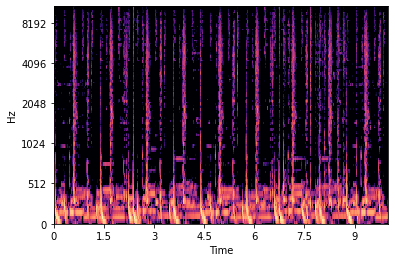

In [14]:
for path in dirs:
    arr = np.load('../npy_audio/' + path)
    mel_sgram = librosa.amplitude_to_db(arr)
    
    librosa.display.specshow(mel_sgram, sr=22050, x_axis='time', y_axis='mel')

In [8]:
import librosa
import librosa.display
from scipy.io.wavfile import write

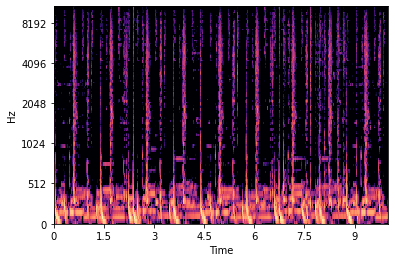

In [13]:
mel_sgram = librosa.amplitude_to_db(arr)
librosa.display.specshow(mel_sgram, sr=22050, x_axis='time', y_axis='mel')

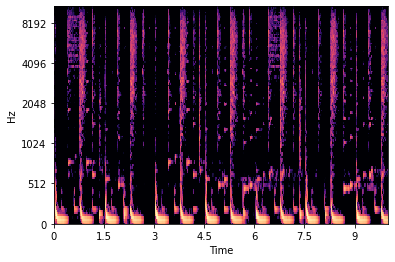

In [16]:
arr = np.load('../npy_audio/' + dirs[2])
mel_sgram = librosa.amplitude_to_db(arr)
librosa.display.specshow(mel_sgram, sr=22050, x_axis='time', y_axis='mel')

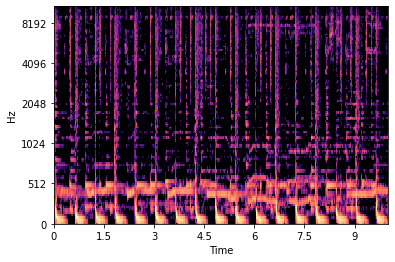

In [26]:
arr = np.load('../npy_audio/' + dirs[1])
mel_sgram = librosa.amplitude_to_db(arr)
librosa.display.specshow(mel_sgram, sr=22050, x_axis='time', y_axis='mel')

In [27]:
specgram = librosa.db_to_amplitude(mel_sgram)
audio = librosa.feature.inverse.mel_to_audio(specgram, n_fft=1024, hop_length = 512).reshape(1, -1)
write('../test.wav', 22050, audio.squeeze())

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as wav
import torch

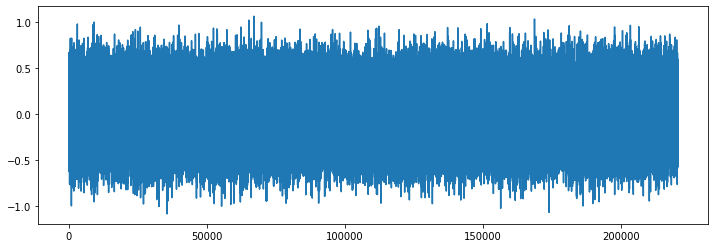

In [6]:
a = torch.randn(220500, 1).numpy() / 4
plt.figure(figsize=(12, 4))
plt.plot(a)

In [2]:
len(os.listdir('../video'))

450

In [48]:
audio, sample_rate = librosa.load('../refined_wav/mLH1.wav')
scipy_sample_rate, scipy_audio = wav.read('../refined_wav/mBR0.wav')

In [49]:
print('Original audio file min~max range: {} to {}'.format(np.min(scipy_audio), np.max(scipy_audio)))
print('Librosa audio file min~max range: {0:.2f} to {0:.2f}'.format(np.min(audio), np.max(audio)))

Original audio file min~max range: -2147483393 to 2147418368
Librosa audio file min~max range: -0.99 to -0.99


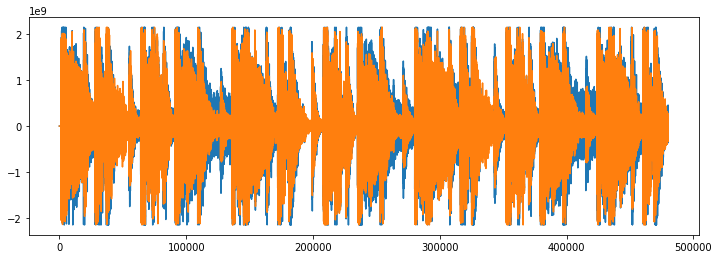

In [50]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_audio)

In [51]:
fake = np.load('../example_generation_1.npy')
plt.figure(figsize=(12,4))
fake.shape

(431, 128)

<Figure size 864x288 with 0 Axes>

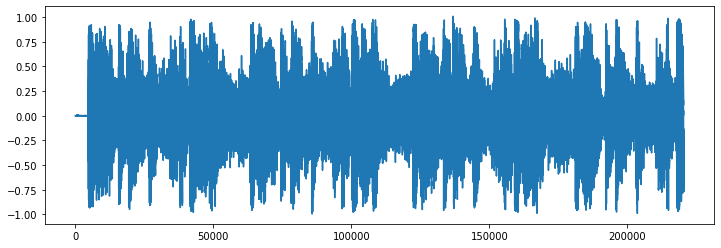

In [52]:
plt.figure(figsize=(12,4))
plt.plot(audio)

In [22]:
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc = 64)
mfccs.shape

(64, 431)

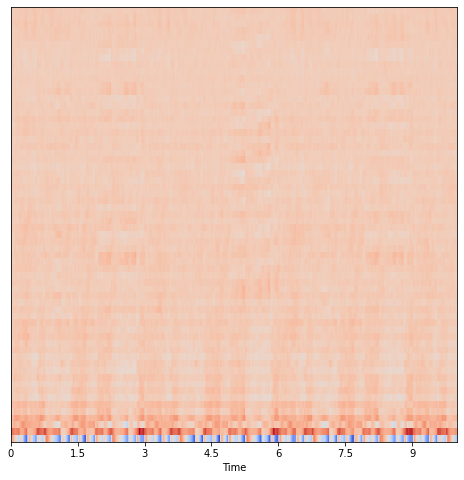

In [23]:
plt.figure(figsize=(8,8))
librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

In [19]:
from scipy.io.wavfile import write

write('librosa.wav', sample_rate, audio.squeeze())
write('scipy.wav', scipy_sample_rate, scipy_audio.squeeze())


In [24]:
# MFCC to audio
a = librosa.feature.inverse.mfcc_to_audio(mfccs)

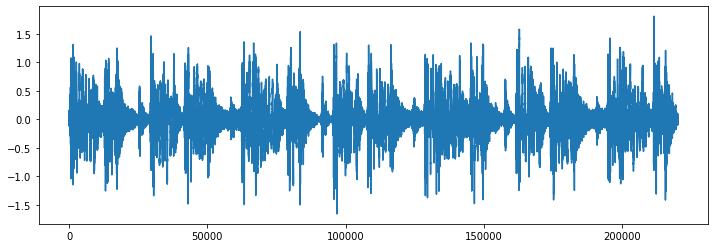

In [26]:
plt.figure(figsize=(12,4))
plt.plot(a)

In [27]:
write('librosa.wav', sample_rate, a.squeeze())

In [41]:
def audio_to_mfcc(audio_dir, sample_rate=22050, n_mfcc=64):
    audio, sample_rate = librosa.load(audio_dir, sr=sample_rate)
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
    plt.figure(figsize=(12,6))
    librosa.display.specshow(mfccs, sr=sample_rate, x_axis='time')

    return mfccs

def mfcc_to_audio(mfccs, audio_dir, sample_rate=22050):
    audio = librosa.feature.inverse.mfcc_to_audio(mfccs, sr=sample_rate)
    plt.figure(figsize=(12,4))
    plt.plot(audio)
    write(audio_dir, sample_rate, audio.squeeze())

    return audio

(128, 431)

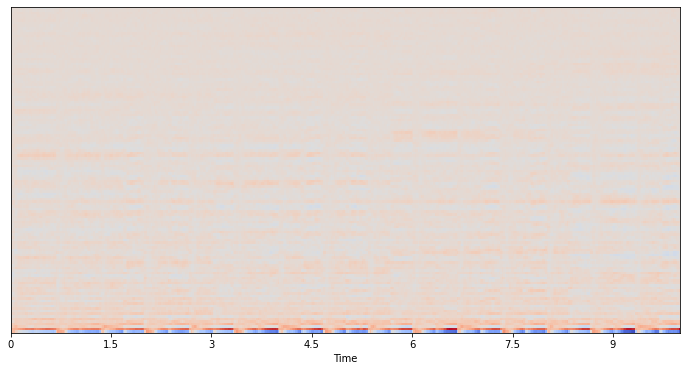

In [80]:
mfccs = audio_to_mfcc('../refined_wav/mJS1.wav', 22050, n_mfcc=128)
mfccs.shape

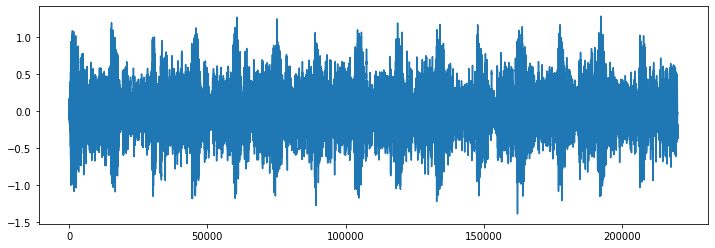

In [81]:
audio_1 = mfcc_to_audio(mfccs, 'librosa.wav', 22050)

In [9]:
audio.shape

(479744,)

In [44]:
write('librosa.wav', 48000, audio.squeeze())

In [23]:
max_val = np.zeros((60, 128))
min_val = np.zeros((60, 128))

for i, path in enumerate(os.listdir('../audio_mfcc')):
    mfcc = np.load(os.path.join('../audio_mfcc', path))
    max_val[i, :] = np.max(mfcc, axis=1)
    min_val[i, :] = np.min(mfcc, axis=1)

max_val = np.max(max_val, axis=0)
min_val = np.min(min_val, axis=0)

In [24]:
max_val.shape, min_val.shape

((128,), (128,))

In [25]:
max_val.max(), max_val.min(), min_val.max(), min_val.min()

(250.5442657470703, 7.351387023925781, -7.244397163391113, -496.7255859375)

In [26]:
np.save('../audio_mfcc/max', max_val, allow_pickle=True, fix_imports=True)
np.save('../audio_mfcc/min', min_val, allow_pickle=True, fix_imports=True)

In [28]:
mu_np = np.load('../audio_mfcc/max.npy')
std_np = np.load('../audio_mfcc/min.npy')

In [29]:
(mu_np - max_val).sum(), (std_np - min_val).sum()

(0.0, 0.0)

In [35]:
a = (mfcc.T - min_val) / (max_val - min_val)
a.shape

(431, 128)

In [40]:
a[a > 1], a[a < -1], a[a > -1]

(array([], dtype=float64),
 array([], dtype=float64),
 array([0.70264895, 0.5264697 , 0.42689663, ..., 0.34695852, 0.35195437,
        0.69184156]))

In [42]:
a = 2 * a - 1
a.min(), a.max()

(-0.9641215728585755, 0.9697586160368787)

(128, 431)


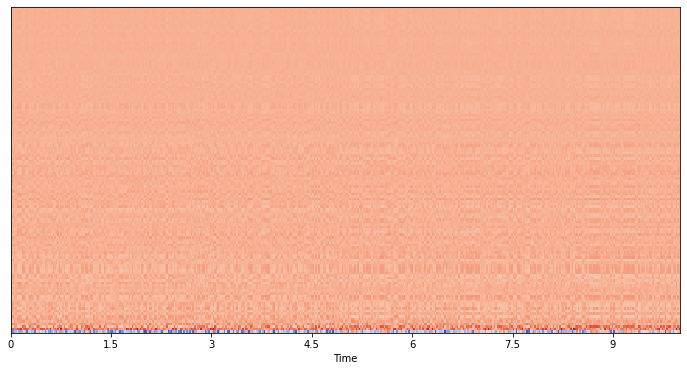

In [34]:
print(fake.shape)
plt.figure(figsize=(12,6))
librosa.display.specshow(fake, sr=22050, x_axis='time')

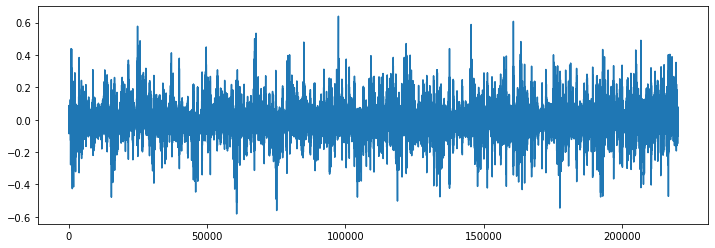

In [101]:
sample_rate = 22050
# audio_fake = librosa.feature.inverse.mfcc_to_audio(fake / 5, sr=sample_rate, n_mels=128)
plt.figure(figsize=(12,4))
plt.plot(combine * 3)
write('test.wav', sample_rate, combine.squeeze() * 3)

In [18]:
(mfcc - mfccs[:, :431]).sum()

79568.21840543888

In [19]:
mfcc.min(), mfcc.max()

(-496.71783792557926, 250.54096022074827)

In [20]:
mfccs.min(), mfccs.max()


(-466.81107, 205.14731)

In [28]:
fake = fake.T
fake_n =  2 * ((fake - fake.min()) / (fake.max() - fake.min())) - 1


In [7]:
audio, sample_rate = librosa.load('../refined_wav/mBR0.wav')
scipy_sample_rate, scipy_audio = wav.read('../refined_wav/mBR0.wav')

NameError: name 'librosa' is not defined

In [31]:
fake = np.load('../example_generation_1.npy')
fake = fake.T

In [33]:
fake.max(), fake.min()

(213.83329320754638, -469.3116995926857)

In [99]:
combine = audio_fake * 0.3  + (np.exp(audio) - audio)* 0.3 -  + (np.exp(audio_1) - audio_1) * 0.3

In [56]:
fake = np.load('../example_generation_1.npy').T

In [100]:
combine = combine / 2

array([ 0.07715197,  0.01849142,  0.08486879, ..., -0.11549688,
        0.0313844 ,  0.09620862], dtype=float32)

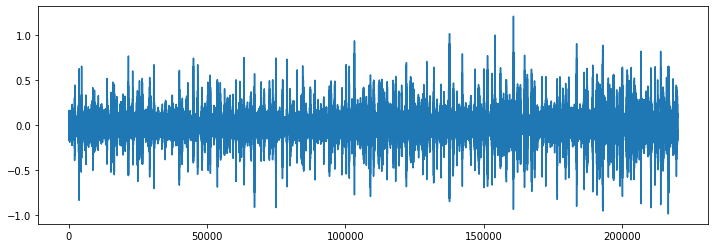

In [59]:
mfcc_to_audio(fake / 5, 'test.wav', 22050)